In [84]:
import pandas as pd
import numpy as np

In [57]:
dis_met_mat = pd.read_csv('data/dis_met_mat.csv',header=None)
met_gene_mat = pd.read_csv('data/met_gene_mat.csv',header=None)
dis_gene_mat = pd.read_csv('data/dis_gene_mat.csv',header=None)

In [58]:
dieaseSmi = pd.read_excel('DMS.xlsx',header=None)

In [86]:
def silimarity_helper(l1,l2,data):
    sim1 = 0.0
    sim2 = 0.0
    for i in l1:
        sim1 += np.max([data.iloc[i,j] for j in l2])
    for i in l2:
        sim2 += np.max([data.iloc[i,j] for j in l1])
        
    return (sim1+sim2)/(len(l1)+len(l2))
    
def silimarity(df,data):
    nums = df.shape[1]
    print((nums,nums))
    rmap = np.zeros((nums,nums))
    for i in range(nums):
        for j in range(i,nums):
            #print(i,j)
            list1 = list(df[i])
            list2 = list(df[j])
            list1 = [idx for idx,e in enumerate(list1) if e != 0.0]
            list2 = [idx for idx,e in enumerate(list2) if e != 0.0]
            #print(list1,list2)
            if (len(list1) != 0)&(len(list2) != 0):
                rmap[i,j] = silimarity_helper(list1,list2,data)
                rmap[j,i] = rmap[i,j]
    return rmap

In [87]:
geneSim = silimarity(dis_gene_mat,dieaseSmi)

(122, 122)


In [64]:
pd.DataFrame(geneSim).to_csv('data/geneSim.csv',header=None,index=None)

In [ ]:
metSim = silimarity(dis_met_mat,dieaseSmi)

In [67]:
pd.DataFrame(metSim).to_csv('data/metSim.csv',header=None,index=None)

In [69]:
pd.DataFrame(dieaseSmi).to_csv('data/dieaseSmi.csv',header=None,index=None)

<Axes: >

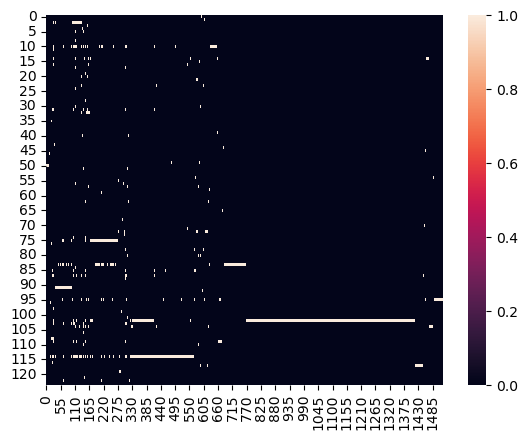

In [91]:
seaborn.heatmap(dis_met_mat)

<Axes: >

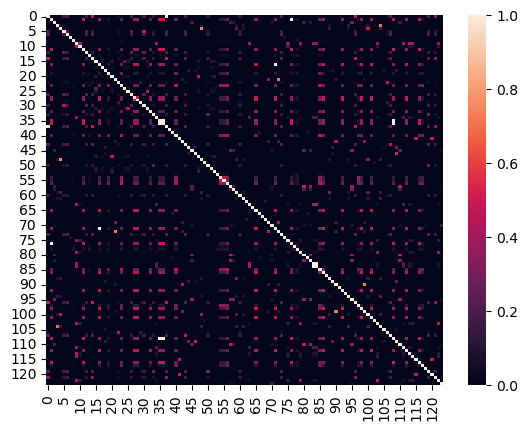

In [93]:
seaborn.heatmap(dieaseSmi)